In [85]:
import sys, traceback
import cv2 as cv
import os
import re
import numpy as np
import argparse
import string
from plantcv import plantcv as pcv
import glob
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
pcv.params.debug = 'plot' 

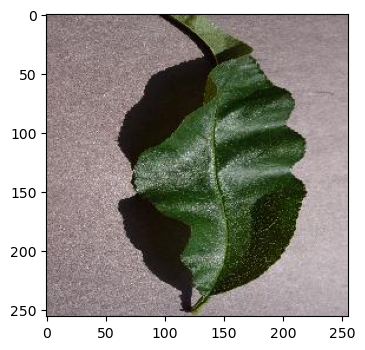

In [86]:
images = glob.glob('../resources/Plant_leave_diseases_dataset_without_augmentation/Peach*/*')
img=images[47]
img, path, filename = pcv.readimage(img)

## Convertion to gray img

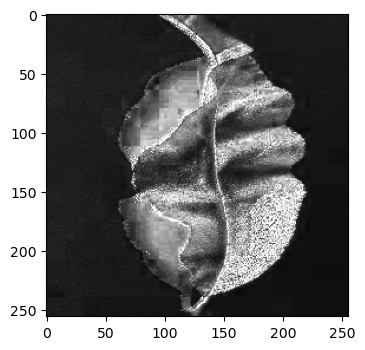

In [87]:
gray_img = pcv.rgb2gray_hsv(rgb_img=img, channel='s')

## Smoothening using gaussian blurr

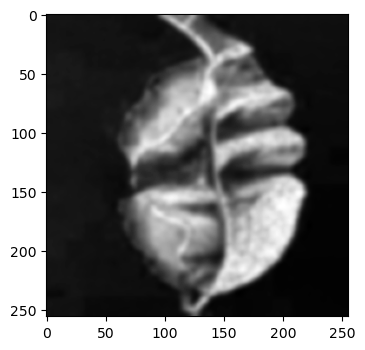

In [88]:
b_gi = pcv.gaussian_blur(img=gray_img, ksize=(11, 11), sigma_x=0, sigma_y=None)

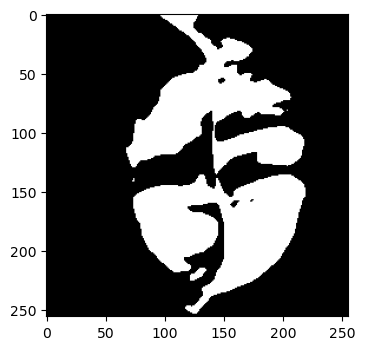

In [89]:
cropped_mask = pcv.threshold.otsu(gray_img=b_gi, max_value=255, object_type='light')

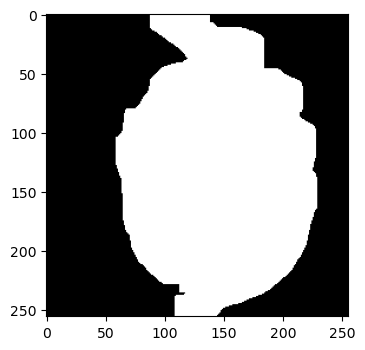

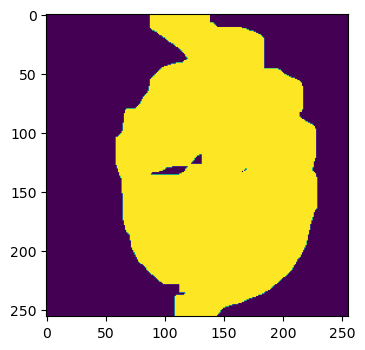

In [90]:
# closing = cv.morphologyEx(cropped_mask, cv.MORPH_CLOSE, kernel)

# contour,hier = cv.findContours(cropped_mask,cv.RETR_CCOMP,cv.CHAIN_APPROX_SIMPLE)
dilation = cv.dilate(cropped_mask,kernel,iterations = 1)
closing = pcv.fill_holes(bin_img=dilation)

# plt.imshow(cropped_mask)
# for cnt in contour:
#     cv.drawContours(cropped_mask,[cnt],0,255,-1)

# gray = cv.bitwise_not(cropped_mask)
plt.imshow(dilation)
# plt.imshow(closing)

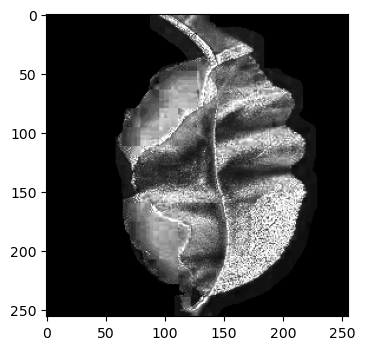

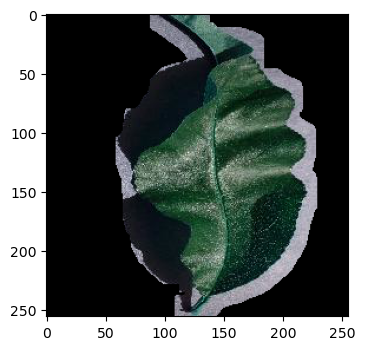

In [91]:
and_image = pcv.logical_and(gray_img, closing)
img1_bg = cv.bitwise_and(img,img,mask = closing)
plt.imshow(img1_bg)

# Morphological transform

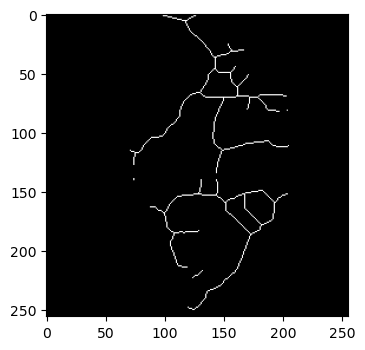

In [92]:
skeleton = pcv.morphology.skeletonize(mask=cropped_mask)

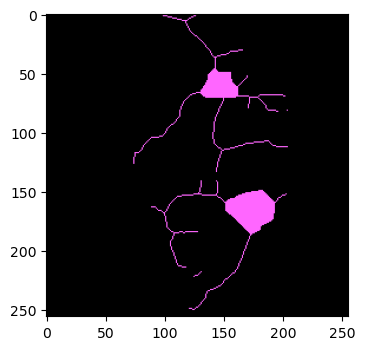

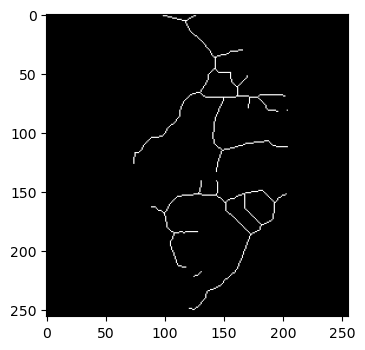

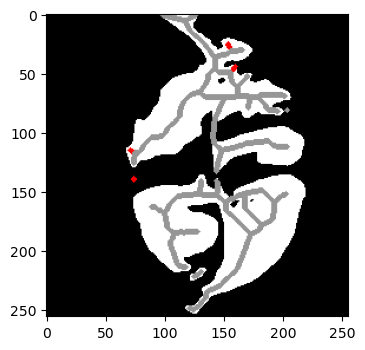

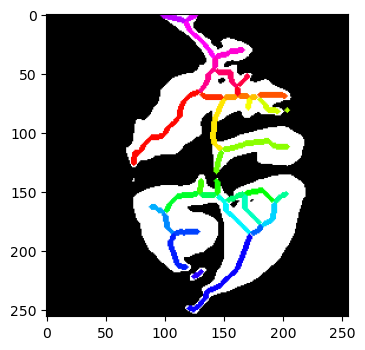

In [93]:
img1, seg_img, edge_objects = pcv.morphology.prune(skel_img=skeleton, size=10, mask=cropped_mask)

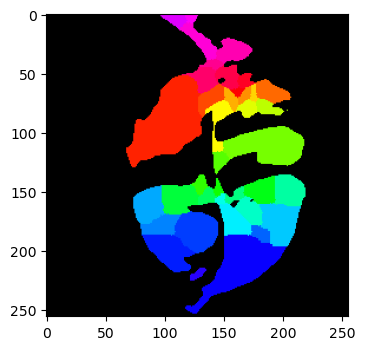

In [94]:
filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects, label="default")

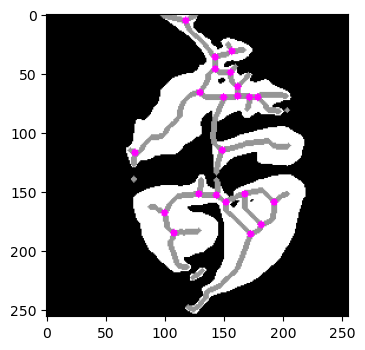

In [95]:
branch_pts_mask = pcv.morphology.find_branch_pts(skel_img=skeleton, mask=cropped_mask, label="default")

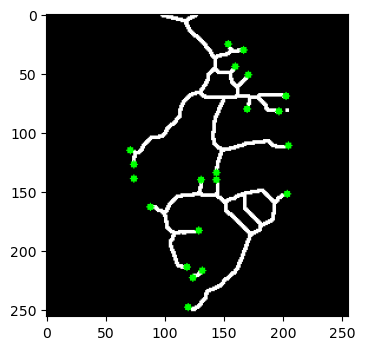

In [96]:
tip_pts_mask = pcv.morphology.find_tips(skel_img=skeleton, mask=None, label="default")

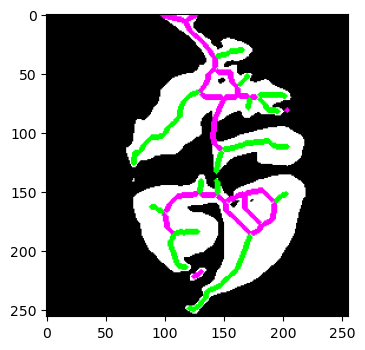

In [97]:
pcv.params.line_thickness = 3 
leaf_obj, stem_obj = pcv.morphology.segment_sort(skel_img=skeleton, 
                                                 objects=edge_objects,
                                                 mask=cropped_mask)

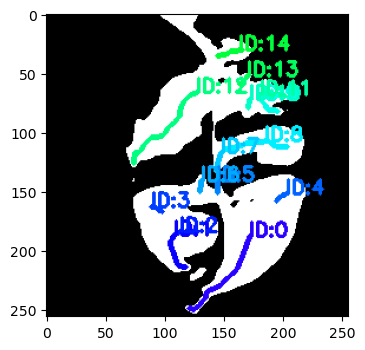

In [98]:
segmented_img, labeled_img = pcv.morphology.segment_id(skel_img=skeleton,
                                                       objects=leaf_obj,
                                                       mask=cropped_mask)

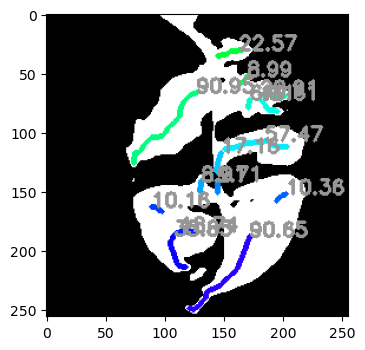

In [99]:
labeled_img  = pcv.morphology.segment_path_length(segmented_img=segmented_img, 
                                                  objects=leaf_obj, label="default")

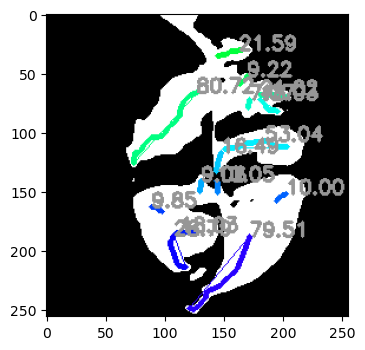

In [100]:
labeled_img = pcv.morphology.segment_euclidean_length(segmented_img=segmented_img, 
                                                      objects=leaf_obj, label="default")